In [12]:
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [74]:
plt.rc("font", size=12)
plt.rc("lines", linewidth=2)

In [10]:
# m_a^2 = Lambda^4 / f_a^2 
switch_hubble_and_time_rad_dom = lambda x: 1 / (2*x)
def rhs(t_axion, y):
    theta, theta_dot = y
    H_over_m = switch_hubble_and_time_rad_dom(t_axion)
    theta_dotdot = - 3 * H_over_m * theta_dot - np.sin(theta)
    return theta_dot, theta_dotdot

In [17]:
def min_theta_dot(theta_i): return np.sqrt(2*(1 - np.cos(theta_i)))

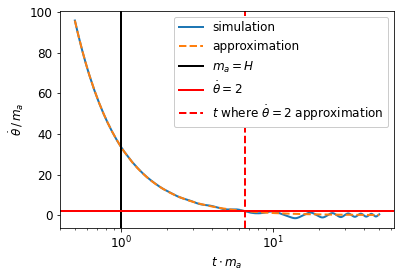

In [82]:
theta_i = 1.0
dot_theta_i = 100 * min_theta_dot(theta_i)
H_init = 1
H_end = 1e-2
sol = solve_ivp(rhs, (switch_hubble_and_time_rad_dom(H_init), switch_hubble_and_time_rad_dom(H_end)), 
                [theta_i, dot_theta_i], dense_output=True, method="BDF")
assert sol.success
plt.plot(sol.t, sol.sol(sol.t)[1], label="simulation")
plt.plot(sol.t, dot_theta_i * (sol.t / sol.t[0])**(-3/2), "--", label="approximation")
plt.axvline(1.0, label=r"$m_a = H$", color="black", ls="-")
plt.axhline(2.0, label=r"$\dot{\theta} = 2$", color="r")
plt.axvline(sol.t[0] * (2 / dot_theta_i)**(-2/3), color="r", ls="--", label=r"$t$ where $\dot{\theta} = 2$ approximation")
plt.xscale("log")
plt.xlabel(r"$t \cdot m_a$")
plt.ylabel(r"$\dot{\theta} \, / \, m_a$")
plt.legend(framealpha=1)

In [42]:
H_inf = 1e12 # GeV
m_a = 1e9
v = 10.0
theta_i = 1.0
theta_dot_i = v * min_theta_dot(theta_i)
H_start = H_inf / m_a
H_end = 10 * H_start * 

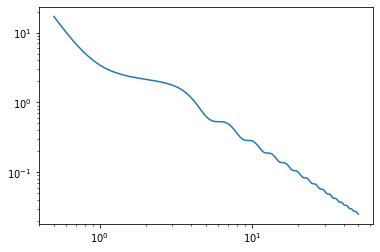

In [46]:
plt.loglog(sol.t, rho_prime)